## Classification of river water using Biochemical Oxygen Demand

Predicting BOD in river water on the monitoring stations data

## About the Dataset 

* This dataset has data of the amount of biochemical oxygen demand, which is determined in 5 days ("BOD5" or "BOD"), in river water.
* There are 8 consecutive stations of the state water monitoring system. It's should predict the value in the eighth station by the first seven stations. The numbering of stations in the dataset is done from the target station upstream, ie closest to it - first, upstream - second, etc.
* Data are average monthly. The number of observations on stations is different (from 4 to about 20 years).
* Training and test data are chosen so that the percentage of non-NA values on stations with long and short series data is approximately the same. 

## Indicators of river water quality in this dataset are:

    Dissolved oxygen (O2) is measured in mgO2/cub. dm (ie milligrams of oxygen (O2) in the cubic decimeter);

    Ammonium ions (NH4) concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter);

    Nitrite ions (NO2) concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter);

    Nitrate ions (NO3) concentration is measured in mg/cub. dm (ie milligrams in the cubic decimeter);

    Biochemical oxygen demand, which is determined in 5 days ("BOD5" or "BOD"). BOD5 is measured in mgO/cub. dm (ie milligrams of oxygen in the cubic decimeter).


**The maximum permissible value of BOD in Ukraine is 3 mgO/cub. dm.**

### Columns in the Dataset
* **Id** - the unique id of a given monthly averaged data;

* **target** - a values of monthly averaged data of BOD in target station, mgO/cub. dm;

* **1-7** - a values of monthly averaged data of BOD in stations 1-7 (in seven stations located from the target station upstream), mgO/cub. dm.


## Inspiration 

1. Analysis of data dependences, including EDA.
2. Prediction the target data (water quaity in the target station) with the highest accuracy.
3. Analysis of impact on the prediction accuracy of the first two stations (1-2) and the next five (3-7) stations separately

## Importing the necessary libraries for the project

In [20]:
import pandas as pd   # Adds data structures and tools designed to work with table-like data
import numpy as np   # Used for multidimensional arrays and matrices as well as statistical operations
import matplotlib.pyplot as plt  # Provides 2D plotting functions
import seaborn as sns  # Provides high level interface for drawing attractive statistical graphic

## Loading the Data Set (Using Pandas)

In [21]:
df_bod = pd.read_csv('BOD_Ukraine.csv')

# Printing the first 5 rows of the dataset
df_bod.head()

,Id,target,1,2,3,4,5,6,7
0,0,5.85,4.80,5.85,NaN,NaN,NaN,NaN,NaN
1,3,4.28,5.88,6.84,NaN,NaN,NaN,NaN,NaN
2,4,3.97,3.20,2.70,NaN,NaN,NaN,NaN,NaN
3,5,5.95,7.70,7.06,NaN,NaN,NaN,NaN,NaN
4,6,4.70,5.50,5.30,NaN,NaN,NaN,NaN,NaN


We won't need an ID column for our prediction

In [22]:
# Dropping the Id Column, since it doesn't contribute anything to our analysis
df_bod.drop(columns=['Id'],inplace=True)
# df_test.drop(columns=['Id'],inplace=True)

In [23]:
# To give the overall description of the dataset
df_bod.describe()

,target,1,2,3,4,5,6,7
count,147.000000,145.000000,145.000000,32.000000,31.000000,33.000000,37.000000,37.000000
mean,5.021633,4.972621,4.906552,4.665000,5.871613,8.678788,3.883784,3.957568
std,2.122535,2.044076,2.001357,2.057429,2.555247,5.299119,1.615455,1.916953
min,1.300000,0.900000,1.040000,2.040000,2.480000,2.880000,1.000000,1.600000
25%,3.720000,3.500000,3.400000,3.325000,4.445000,5.840000,2.900000,2.900000
50%,4.600000,4.800000,4.830000,4.150000,5.500000,7.300000,3.400000,3.500000
75%,6.275000,6.450000,6.200000,5.970000,6.400000,8.420000,4.800000,4.400000
max,11.700000,10.900000,11.000000,10.660000,14.790000,27.120000,8.540000,10.370000


In [24]:
# To Display the Overall information of the dataset
df_bod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
target    147 non-null float64
1         145 non-null float64
2         145 non-null float64
3         32 non-null float64
4         31 non-null float64
5         33 non-null float64
6         37 non-null float64
7         37 non-null float64
dtypes: float64(8)
memory usage: 9.3 KB


In [25]:
# Displaying the columns of the dataset
df_bod.columns

Index(['target', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [26]:
# Displaying the shape of the dataset 
print("Shape of DataSet: ", df_bod.shape)
# print("Shape of Test Data: ", df_test.shape)

Shape of DataSet:  (147, 8)


<hr>

## Feature Extraction and Visual Analysis of the Dataset

### Making a Correlation Matrix

It is a table showing correlation coefficients between variables.

In [27]:
corr = df_bod[df_bod.columns.to_list()[1:]].corr()
corr

,1,2,3,4,5,6,7
1,1.000000,0.735809,-0.045895,-0.225394,0.040384,-0.066519,-0.068133
2,0.735809,1.000000,0.047233,-0.223488,-0.115455,-0.038683,-0.138312
3,-0.045895,0.047233,1.000000,0.369179,0.043051,0.494418,0.648072
4,-0.225394,-0.223488,0.369179,1.000000,0.696659,0.209342,0.255105
5,0.040384,-0.115455,0.043051,0.696659,1.000000,0.271829,0.277095
6,-0.066519,-0.038683,0.494418,0.209342,0.271829,1.000000,0.700161
7,-0.068133,-0.138312,0.648072,0.255105,0.277095,0.700161,1.000000


The Biggest Correlation is between the first two features and our target value

## Heatmap of Correlation Matrix using Seaborn

Variables are correlated to each other from a scale of 1 being the most correlated and -1 is not correlated at all. 

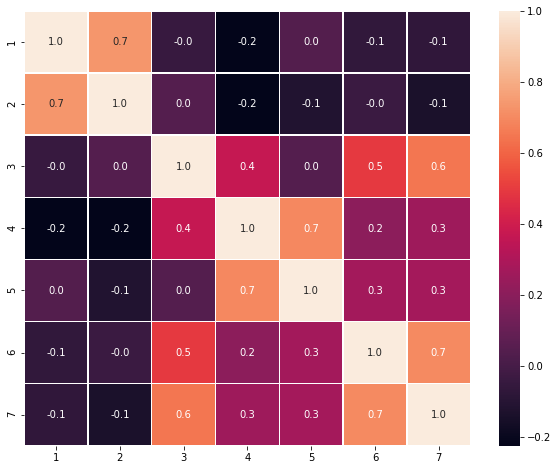

In [28]:
# Heatmap of Correlation 
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, annot=True, fmt='.1f')
plt.show()

## Visualization 

### Pairplot 
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

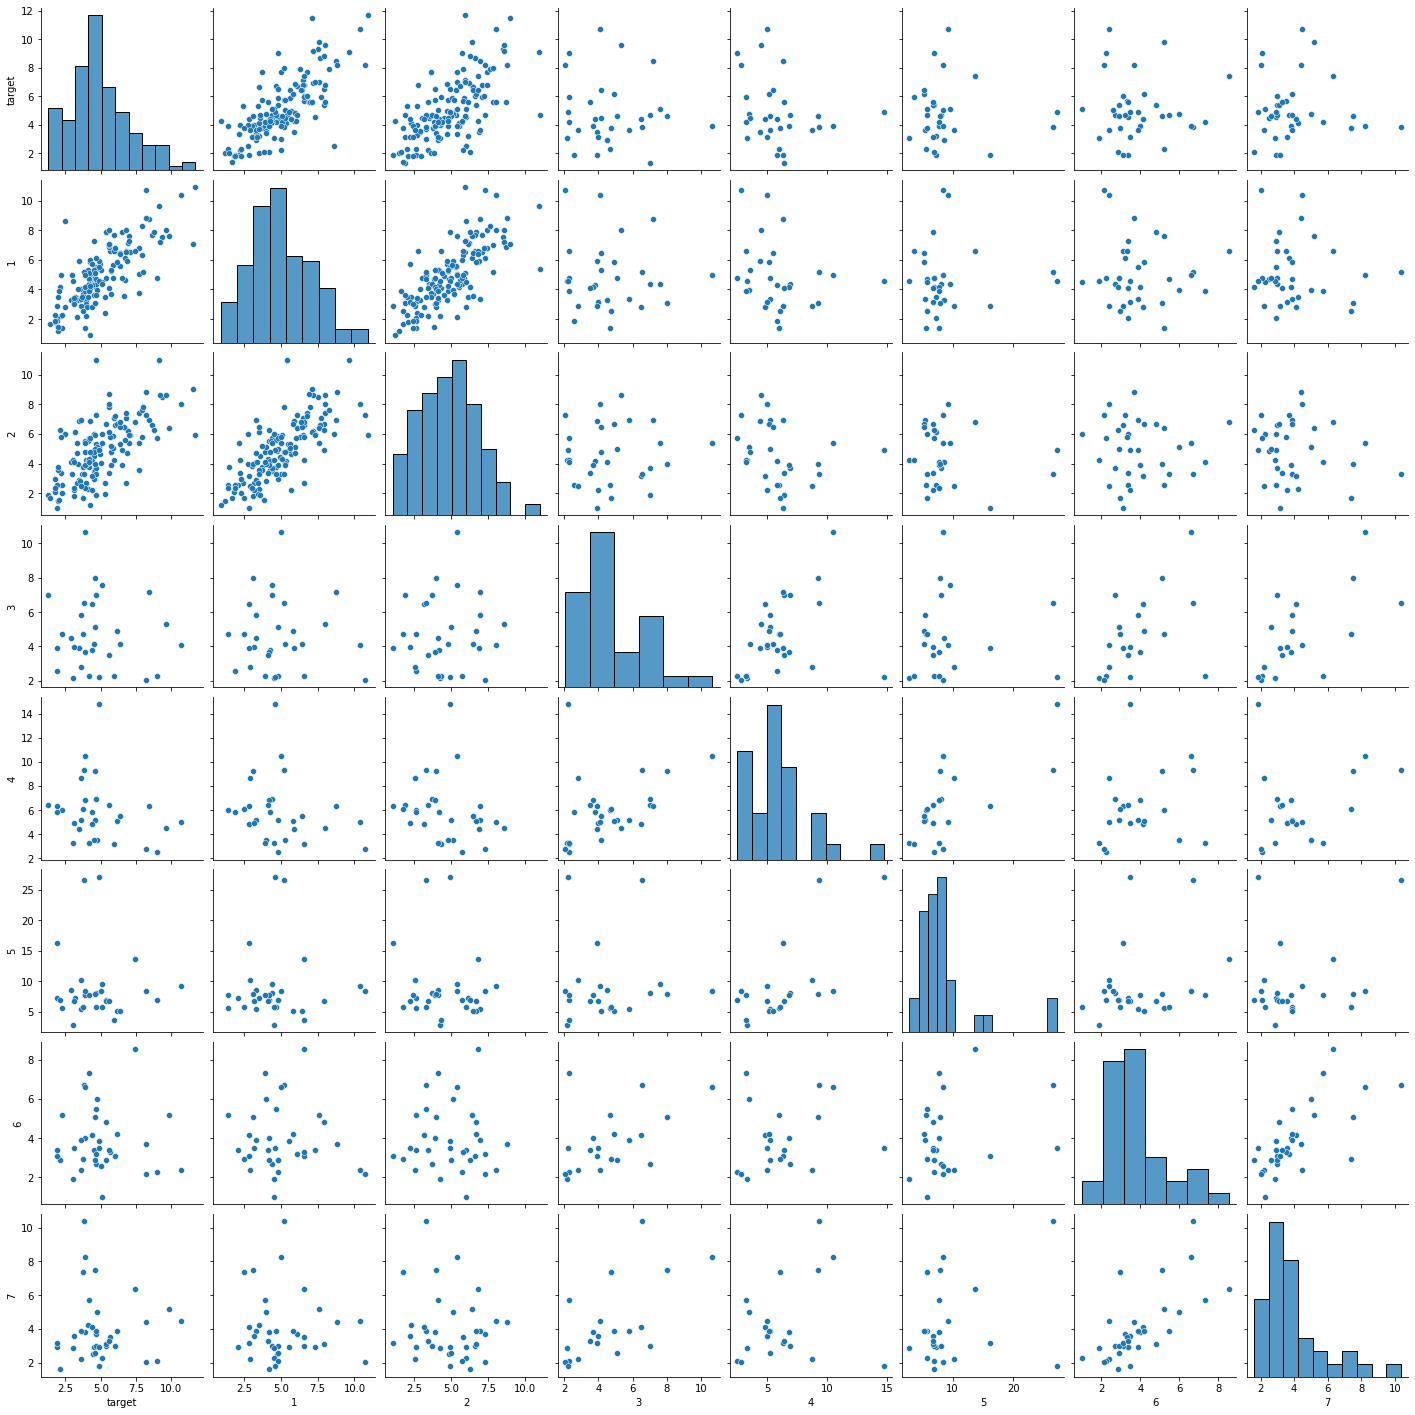

In [29]:
sns.pairplot(df_bod)
plt.show()

### Analysis of Target using CountPlot

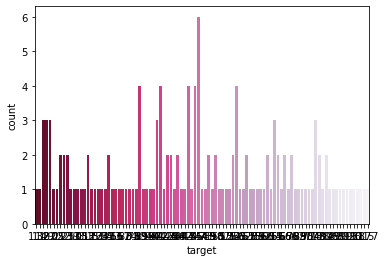

In [30]:
sns.countplot(x=df_bod['target'], data=df_bod, palette="PuRd_r")
plt.show()

#### We find that the target values are scattered all over the place 

Therefore we need to convert this regression problem into a classification problem  
We'll see this later

### Datapoint distribution using DistPlot 

Analysing distribution of our dataset wrt target value

/home/afroz/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of data points in the dataset')

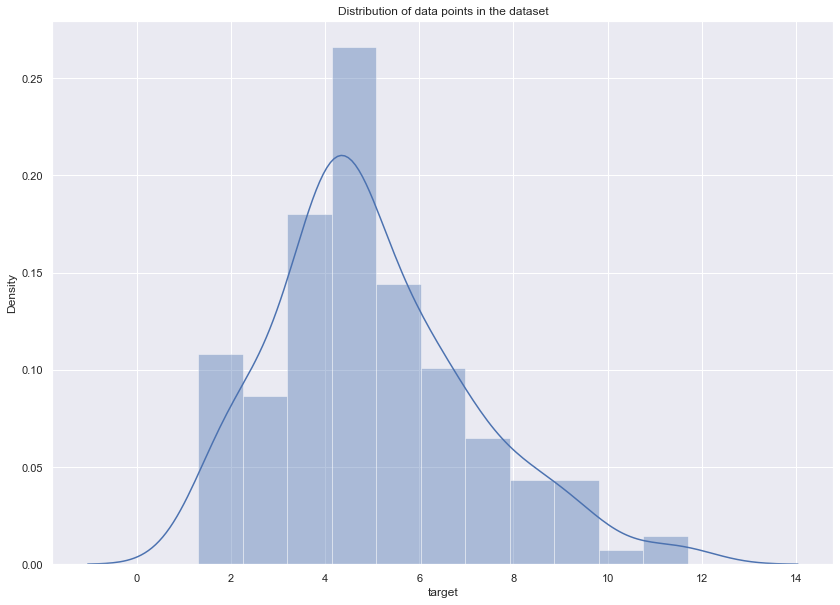

In [31]:
sns.set()
plt.figure(figsize=(14, 10))
sns.distplot(df_bod['target'])
plt.title('Distribution of data points in the dataset')

<hr>

## Managing Categorical Data 

In many classification problems, the target dataset is made up of categorical labels which cannot immediately be processed by an algorithm.

**Since we don't have any categorical labels, we don't need to use LabelEncoder.**

## Missing Features and Imputer Class

Null Values in the dataset can be removed by three ways -  
1) Removing the row
2) Creating sub-model to predict those features
3) Using Imputer

### a. NULL Value

Looking at our dataset most values in feature columns from 3 to 7 consist of mostly NaN values. 

As more than 50 % of the values are NaN, Thus it's better to drop them as they won't contribute anything to our model

In [32]:
# Finding which columns have most NaN values
df_bod.isna().sum()

target      0
1           2
2           2
3         115
4         116
5         114
6         110
7         110
dtype: int64

In [33]:
# Listing first 3 columns
df_bod.columns.to_list()[:3]

['target', '1', '2']

In [34]:
# Assiging df to the first 2 columns only 
df_bod = df_bod[df_bod.columns.to_list()[:3]]

In [35]:
# Finding the number of missing rows in them
df_bod.isna().sum()

target    0
1         2
2         2
dtype: int64

In [36]:
# Separating the nan cols 
nan_cols = df_bod.isna().sum()[df_bod.isna().sum()>0].index.to_list()

### b. Imputer

Imputing the NaN values in the first two features

Scikit-learn offers the class Imputer, which is responsible for filling the holes using a strategy based on the mean (default choice), median, or frequency (the most frequent entry will be used for all the missing ones).

In [37]:
# Removing Null Values using SimpleImputer MEAN METHOD -

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit_transform(df_bod)

array([[ 5.85      ,  4.8       ,  5.85      ],
       [ 4.28      ,  5.88      ,  6.84      ],
       [ 3.97      ,  3.2       ,  2.7       ],
       [ 5.95      ,  7.7       ,  7.06      ],
       [ 4.7       ,  5.5       ,  5.3       ],
       [ 4.36      ,  4.91      ,  4.48      ],
       [ 3.74      ,  3.71      ,  3.76      ],
       [ 7.7       ,  3.75      ,  3.6       ],
       [ 3.34      ,  2.13      ,  5.4       ],
       [ 3.96      ,  2.24      ,  4.22      ],
       [ 4.98      ,  5.7       ,  4.68      ],
       [ 6.79      ,  6.58      ,  2.72      ],
       [ 2.        ,  1.17      ,  1.46      ],
       [ 9.3       ,  7.55      ,  8.5       ],
       [ 4.1       ,  5.35      ,  4.15      ],
       [ 3.93      ,  3.05      ,  3.87      ],
       [ 4.47      ,  4.73      ,  4.83      ],
       [ 4.1       ,  3.5       ,  2.3       ],
       [ 4.5       ,  4.8       ,  3.        ],
       [ 5.        ,  5.3       ,  4.07      ],
       [ 5.75      ,  5.23      ,  4.8  

In [38]:
# Removing Null Values using SimpleImputer MEDIAN METHOD -

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit_transform(df_bod)

array([[ 5.85,  4.8 ,  5.85],
       [ 4.28,  5.88,  6.84],
       [ 3.97,  3.2 ,  2.7 ],
       [ 5.95,  7.7 ,  7.06],
       [ 4.7 ,  5.5 ,  5.3 ],
       [ 4.36,  4.91,  4.48],
       [ 3.74,  3.71,  3.76],
       [ 7.7 ,  3.75,  3.6 ],
       [ 3.34,  2.13,  5.4 ],
       [ 3.96,  2.24,  4.22],
       [ 4.98,  5.7 ,  4.68],
       [ 6.79,  6.58,  2.72],
       [ 2.  ,  1.17,  1.46],
       [ 9.3 ,  7.55,  8.5 ],
       [ 4.1 ,  5.35,  4.15],
       [ 3.93,  3.05,  3.87],
       [ 4.47,  4.73,  4.83],
       [ 4.1 ,  3.5 ,  2.3 ],
       [ 4.5 ,  4.8 ,  3.  ],
       [ 5.  ,  5.3 ,  4.07],
       [ 5.75,  5.23,  4.8 ],
       [ 3.9 ,  3.9 ,  4.8 ],
       [ 6.4 ,  5.6 ,  5.3 ],
       [ 4.5 ,  4.4 ,  3.5 ],
       [ 7.7 ,  6.8 ,  7.4 ],
       [ 3.5 ,  3.3 ,  2.9 ],
       [ 7.1 ,  6.5 ,  5.9 ],
       [ 4.5 ,  3.6 ,  4.5 ],
       [ 4.2 ,  4.7 ,  3.8 ],
       [ 2.2 ,  2.2 ,  3.4 ],
       [ 7.7 ,  5.02,  5.4 ],
       [ 4.6 ,  4.25,  3.55],
       [ 3.3 ,  3.45,  2.7 ],
       [ 7

In [39]:
# Removing Null Values using SimpleImputer MOST_FREQUENT METHOD -

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df_bod)

array([[ 5.85,  4.8 ,  5.85],
       [ 4.28,  5.88,  6.84],
       [ 3.97,  3.2 ,  2.7 ],
       [ 5.95,  7.7 ,  7.06],
       [ 4.7 ,  5.5 ,  5.3 ],
       [ 4.36,  4.91,  4.48],
       [ 3.74,  3.71,  3.76],
       [ 7.7 ,  3.75,  3.6 ],
       [ 3.34,  2.13,  5.4 ],
       [ 3.96,  2.24,  4.22],
       [ 4.98,  5.7 ,  4.68],
       [ 6.79,  6.58,  2.72],
       [ 2.  ,  1.17,  1.46],
       [ 9.3 ,  7.55,  8.5 ],
       [ 4.1 ,  5.35,  4.15],
       [ 3.93,  3.05,  3.87],
       [ 4.47,  4.73,  4.83],
       [ 4.1 ,  3.5 ,  2.3 ],
       [ 4.5 ,  4.8 ,  3.  ],
       [ 5.  ,  5.3 ,  4.07],
       [ 5.75,  5.23,  4.8 ],
       [ 3.9 ,  3.9 ,  4.8 ],
       [ 6.4 ,  5.6 ,  5.3 ],
       [ 4.5 ,  4.4 ,  3.5 ],
       [ 7.7 ,  6.8 ,  7.4 ],
       [ 3.5 ,  3.3 ,  2.9 ],
       [ 7.1 ,  6.5 ,  5.9 ],
       [ 4.5 ,  3.6 ,  4.5 ],
       [ 4.2 ,  4.7 ,  3.8 ],
       [ 2.2 ,  2.2 ,  3.4 ],
       [ 7.7 ,  5.02,  5.4 ],
       [ 4.6 ,  4.25,  3.55],
       [ 3.3 ,  3.45,  2.7 ],
       [ 7

In [40]:
# Using KNNImputer for our case 
from sklearn.impute import KNNImputer

impute =  KNNImputer(n_neighbors=5)
df_bod[nan_cols] = imputer.fit_transform(df_bod[nan_cols])
df_bod

,target,1,2
0,5.85,4.80,5.85
1,4.28,5.88,6.84
2,3.97,3.20,2.70
3,5.95,7.70,7.06
4,4.70,5.50,5.30
...,...,...,...
142,2.20,5.00,5.80
143,5.60,8.00,8.00
144,6.00,6.80,7.20
145,8.00,5.20,7.80


## Feature Engineering 

Creating a new feature which is just an average of the availbale ones.

In [41]:
df_bod.columns.to_list()[1:3]
df_bod['combined'] = df_bod[df_bod.columns.to_list()[1:]].mean(axis=1)
df_bod.head()

,target,1,2,combined
0,5.85,4.80,5.85,5.325
1,4.28,5.88,6.84,6.360
2,3.97,3.20,2.70,2.950
3,5.95,7.70,7.06,7.380
4,4.70,5.50,5.30,5.400


,target,1,2,combined
target,1.000000,0.755657,0.645696,0.753930
1,0.755657,1.000000,0.730224,0.931611
2,0.645696,0.730224,1.000000,0.928601
combined,0.753930,0.931611,0.928601,1.000000


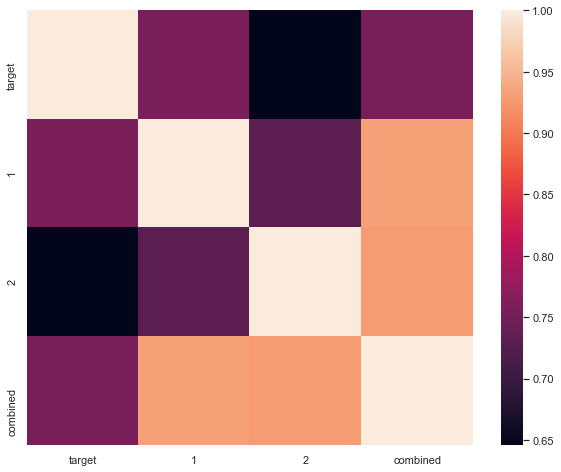

In [42]:
# Finding the correlation for our new feature 
corr = df_bod[df_bod.columns.to_list()].corr()
display(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

 Correlation between new feature and target value is also big enough, thus we will use it for models training.

## Standardization and Normalization

### a. Standardization using StandardScaler()

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(df_bod)

array([[ 0.39160691, -0.08415942,  0.47270337,  0.20576116],
       [-0.35060348,  0.44964599,  0.97228596,  0.76146421],
       [-0.49715458, -0.87498224, -1.11687758, -1.06940285],
       [ 0.43888146,  1.34920694,  1.08330431,  1.30911359],
       [-0.15205038,  0.26182557,  0.19515749,  0.2460295 ],
       [-0.31278384, -0.02979035, -0.21863818, -0.13249287],
       [-0.60588603, -0.62290746, -0.58197097, -0.64792759],
       [ 1.26618604, -0.60313689, -0.66271159, -0.68014226],
       [-0.79498422, -1.403845  ,  0.24562038, -0.63182025],
       [-0.50188203, -1.34947593, -0.34984169, -0.91906772],
       [-0.01968165,  0.36067842, -0.11771241,  0.13327815],
       [ 0.83598766,  0.79563097, -1.106785  , -0.15665388],
       [-1.42846316, -1.87833869, -1.74261738, -1.9472526 ],
       [ 2.02257879,  1.2750673 ,  1.80996988,  1.65542129],
       [-0.43569766,  0.18768593, -0.38516571, -0.10296276],
       [-0.51606439, -0.94912188, -0.52646179, -0.79557816],
       [-0.26078184, -0.

### b. Normalization using Normalizer()

### Max Normalizer

In [44]:
# Performing Max Normalization
from sklearn.preprocessing import Normalizer
n_max=Normalizer(norm="max")
n_max.fit_transform(df_bod)

array([[1.        , 0.82051282, 1.        , 0.91025641],
       [0.62573099, 0.85964912, 1.        , 0.92982456],
       [1.        , 0.80604534, 0.68010076, 0.74307305],
       [0.77272727, 1.        , 0.91688312, 0.95844156],
       [0.85454545, 1.        , 0.96363636, 0.98181818],
       [0.88798371, 1.        , 0.91242363, 0.95621181],
       [0.99468085, 0.98670213, 1.        , 0.99335106],
       [1.        , 0.48701299, 0.46753247, 0.47727273],
       [0.61851852, 0.39444444, 1.        , 0.69722222],
       [0.93838863, 0.53080569, 1.        , 0.76540284],
       [0.87368421, 1.        , 0.82105263, 0.91052632],
       [1.        , 0.96907216, 0.4005891 , 0.68483063],
       [1.        , 0.585     , 0.73      , 0.6575    ],
       [1.        , 0.81182796, 0.91397849, 0.86290323],
       [0.76635514, 1.        , 0.77570093, 0.88785047],
       [1.        , 0.77608142, 0.98473282, 0.88040712],
       [0.92546584, 0.97929607, 1.        , 0.98964803],
       [1.        , 0.85365854,

### L1 Normalizer

In [45]:
# Performing l1 Normalization
n_l1 = Normalizer(norm='l1')
n_l1.fit_transform(df_bod)

array([[0.26804124, 0.21993127, 0.26804124, 0.24398625],
       [0.18321918, 0.25171233, 0.29280822, 0.27226027],
       [0.30967239, 0.24960998, 0.21060842, 0.2301092 ],
       [0.21181915, 0.2741189 , 0.25133499, 0.26272695],
       [0.22488038, 0.26315789, 0.25358852, 0.25837321],
       [0.23637842, 0.2661968 , 0.24288425, 0.25454053],
       [0.25025092, 0.24824356, 0.25158916, 0.24991636],
       [0.41121495, 0.20026702, 0.19225634, 0.19626168],
       [0.22822002, 0.14554151, 0.36897848, 0.25725999],
       [0.29010989, 0.16410256, 0.30915751, 0.23663004],
       [0.24233577, 0.27737226, 0.22773723, 0.25255474],
       [0.32738669, 0.31726133, 0.13114754, 0.22420444],
       [0.33641716, 0.19680404, 0.24558452, 0.22119428],
       [0.27865169, 0.22621723, 0.25468165, 0.24044944],
       [0.22343324, 0.29155313, 0.22615804, 0.25885559],
       [0.27463312, 0.21313767, 0.27044025, 0.24178896],
       [0.23763955, 0.25146199, 0.25677831, 0.25412015],
       [0.3203125 , 0.2734375 ,

## L2 Normalizer

In [46]:
# Performing l2 Normalization
n_l2 = Normalizer(norm='l2')
n_l2.fit_transform(df_bod)

array([[0.53438448, 0.43846931, 0.53438448, 0.48642689],
       [0.36156077, 0.49672368, 0.57782142, 0.53727255],
       [0.61263244, 0.49380952, 0.41665178, 0.45523065],
       [0.42178379, 0.54583784, 0.5004695 , 0.52315367],
       [0.44896491, 0.52538446, 0.50627957, 0.51583202],
       [0.47226676, 0.53184169, 0.48526493, 0.50855331],
       [0.50049615, 0.49648148, 0.5031726 , 0.49982704],
       [0.77070118, 0.37534148, 0.36032782, 0.36783465],
       [0.43472883, 0.27723725, 0.702855  , 0.49004612],
       [0.56605807, 0.32019446, 0.6032235 , 0.46170898],
       [0.48340653, 0.55329663, 0.45428565, 0.50379114],
       [0.62395703, 0.60465939, 0.24995038, 0.42730488],
       [0.65831783, 0.38511593, 0.48057201, 0.43284397],
       [0.55563931, 0.45108353, 0.50784238, 0.47946295],
       [0.44413956, 0.57954797, 0.4495559 , 0.51455193],
       [0.54659355, 0.4242011 , 0.53824861, 0.48122485],
       [0.47507217, 0.50270501, 0.51333302, 0.50801901],
       [0.62699634, 0.53524078,

### Feature Selection and Filtering the dataset 

#### Variance Threshold
It removes all features whose variance doesn't meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [47]:
# Applying Variance Treshold for first three rows
from sklearn.feature_selection import VarianceThreshold
X = df_bod.iloc[0:3,:].values
X


array([[5.85 , 4.8  , 5.85 , 5.325],
       [4.28 , 5.88 , 6.84 , 6.36 ],
       [3.97 , 3.2  , 2.7  , 2.95 ]])

In [48]:
# Here we have kept the threshold as 1.5
vt = VarianceThreshold(threshold=1.5)
X_t = vt.fit_transform(X)
X

array([[5.85 , 4.8  , 5.85 , 5.325],
       [4.28 , 5.88 , 6.84 , 6.36 ],
       [3.97 , 3.2  , 2.7  , 2.95 ]])

## Splitting the Features and Labels along with Testing and Training Set 


In [49]:
from sklearn.model_selection import train_test_split
# For boosting model

target_name = 'target'
df = df_bod
X = df_bod.drop([target_name], axis=1).values
Y = df_bod[target_name].values

# Creating Test and Training set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Principal Component Analysis

* It is a machine learning method for dimensionality reduction is called Principal Component Analysis.
* It is a method that **uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.**

In [50]:
from sklearn.decomposition import PCA 

pca = PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [51]:
pca.n_components_

2

In [52]:
X_train.shape

(102, 3)

In [53]:
y_train.shape

(102,)

In [54]:
Xpca = pca.transform(X_train)

## Classification Algorithm

### 1. K-Nearest Neighbors (KNN)

#### Here we are converting our Regression problem into Classification using given Permisible Limit 

In [55]:
#spliting the training and testing data
X= df_bod.drop('target',axis=1)
# y= np.array([1 if df_bod['target'] > 3.0 else 0])

# Converting this regression problem into classification problem 
# Here if the target value is greater than 3.0, it means that the BOD is above safety limit 
# Else it is within the permissible limit
y = np.where(df_bod['target'] > 3.0, 1, 0)  
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [57]:
# Applying the KNN on our model 
from sklearn.neighbors import KNeighborsClassifier

# After the splitting the data we use the testing data for analysis
knn  = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

# Using the testing data for prediction 
y_pred = knn.predict(X_test)

In [58]:
# Finding the Accuracy of our model along with Confusion matrix 

from sklearn.metrics import confusion_matrix, accuracy_score 

print("Accuracy of KNN model on Test Set: ", accuracy_score(y_test, y_pred))

cnf_matrix1 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for KNN model: \n\n", cnf_matrix1)

print('\n\n\n Classification report\n')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy of KNN model on Test Set:  0.9333333333333333
Confusion Matrix for KNN model: 

 [[ 4  0]
 [ 3 38]]



 Classification report

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.93      0.96        41

    accuracy                           0.93        45
   macro avg       0.79      0.96      0.84        45
weighted avg       0.96      0.93      0.94        45



### 2. Naive Bayes 

In [59]:
# Applying the NaiveBayes on our model 

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train,y_train)

# Using the testing data for prediction
y_pred = gnb.predict(X_test)

In [60]:
# Finding the Accuracy of our model along with Confusion matrix 

from sklearn.metrics import confusion_matrix, accuracy_score 

print("Accuracy of Naive Bayes model on Test Set: ", accuracy_score(y_test, y_pred))

cnf_matrix2 = confusion_matrix(y_test, y_pred)


print("Confusion Matrix for Naive Bayes model: \n\n", cnf_matrix2)

print('\n\n\n Classification report\n')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy of Naive Bayes model on Test Set:  0.8222222222222222
Confusion Matrix for Naive Bayes model: 

 [[ 4  0]
 [ 8 33]]



 Classification report

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       1.00      0.80      0.89        41

    accuracy                           0.82        45
   macro avg       0.67      0.90      0.70        45
weighted avg       0.94      0.82      0.86        45



### 3. Decision Tree Classifier

In [61]:
# Apply Decision Tree Classifier to our model

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=None,splitter='best')
tree.fit(X_train,y_train)
tree.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1])

In [62]:
# Finding the Accuracy of our model along with Confusion matrix 

from sklearn.metrics import confusion_matrix, accuracy_score 

print("Accuracy of Decision Tree model on Test Set: ", accuracy_score(y_test, y_pred))

cnf_matrix3 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for Decision Tree model: \n\n", cnf_matrix3)



print('\n\n\n Classification report\n')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy of Decision Tree model on Test Set:  0.8222222222222222
Confusion Matrix for Decision Tree model: 

 [[ 4  0]
 [ 8 33]]



 Classification report

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         4
           1       1.00      0.80      0.89        41

    accuracy                           0.82        45
   macro avg       0.67      0.90      0.70        45
weighted avg       0.94      0.82      0.86        45



## Comparison & Analysis 

Accuracy for Different Models -  
1. KNN - 93.33 % 
2. Navie Bayes - 82.22 %
3. Decision Tree - 82.22 %

With the accuracy mentioned above we can say that KNN will help us classify with more accuracy

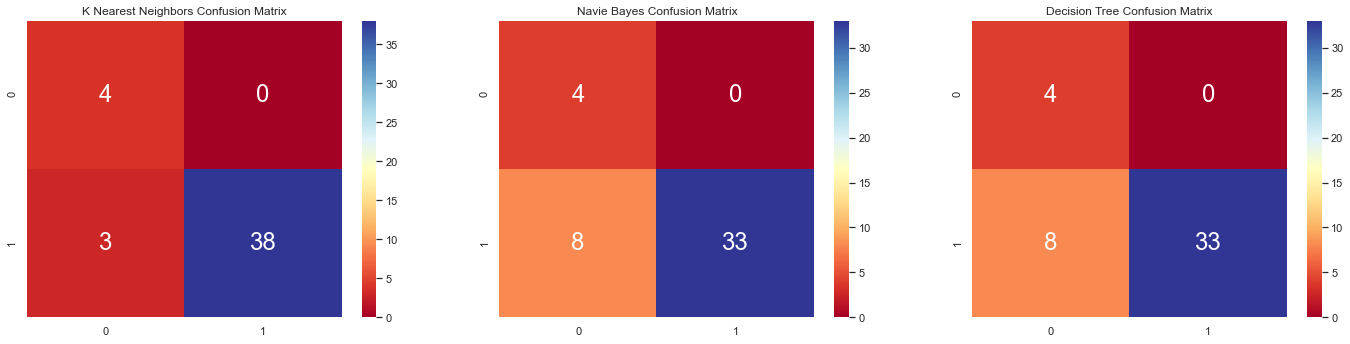

In [63]:
plt.figure(figsize=(24,12))
plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(pd.DataFrame(cnf_matrix1), annot = True, cmap = 'RdYlBu',
           fmt = 'g',annot_kws={"size": 24})
plt.subplot(2,3,2)
plt.title("Navie Bayes Confusion Matrix")
sns.heatmap(pd.DataFrame(cnf_matrix2), annot = True, cmap = 'RdYlBu',
           fmt = 'g',annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(pd.DataFrame(cnf_matrix3), annot = True, cmap = 'RdYlBu',fmt = 'g',annot_kws={"size": 24})


## Clustering the data

Organizing data into classes such that there is high intra-class similarity and low inter-class similarity
In this project 2 different CLustering techniques are used -

1. DBSCAN 
2. Dendogram and Agglomerative Clustering

### 1. DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular learning method utilized in model building and machine learning algorithms. This is a clustering method that is used in machine learning to separate clusters of high density from clusters of low density.

In [64]:
df_bod

,target,1,2,combined
0,5.85,4.80,5.85,5.325
1,4.28,5.88,6.84,6.360
2,3.97,3.20,2.70,2.950
3,5.95,7.70,7.06,7.380
4,4.70,5.50,5.30,5.400
...,...,...,...,...
142,2.20,5.00,5.80,5.400
143,5.60,8.00,8.00,8.000
144,6.00,6.80,7.20,7.000
145,8.00,5.20,7.80,6.500


In [65]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize

A=df_bod.drop(['target'],axis=1)
A.fillna(method = 'ffill', inplace = True )

In [66]:

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)
A_normalized = normalize(A_scaled)
A_normalized = pd.DataFrame(A_normalized)
pca = PCA (n_components = 2)
A_principal = pca.fit_transform(A_normalized)
A_principal = pd.DataFrame(A_principal)
A_principal.columns = ['P1','P2']

In [67]:
db=DBSCAN(eps=0.3,min_samples=10)
db.fit(A_normalized)
# db.fit(A_principal)
labels=db.labels_
labels

array([ 0,  0,  1,  0,  0,  1,  1,  1,  1,  1, -1, -1,  1,  0, -1,  1,  1,
        1,  1,  1, -1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,
        1,  0,  1,  1,  0, -1,  1,  0,  1, -1,  0,  1,  0,  1,  1,  0,  0,
        0,  1, -1,  0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,
       -1, -1,  0,  1,  1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  0,  1, -1,  1,  1,  1,  0,  1,  0,  1,  1,  0, -1,  0,  1,  1,
        0,  0,  0,  0, -1,  0,  1,  1,  0, -1,  0,  0, -1,  0,  0,  0,  1,
        1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0, -1,  0,  0,  1,
        0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1])

In [68]:
set(labels)
db=DBSCAN(eps=0.3,min_samples=5)
db.fit(A_principal)
labels=db.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
set(labels)

{0}

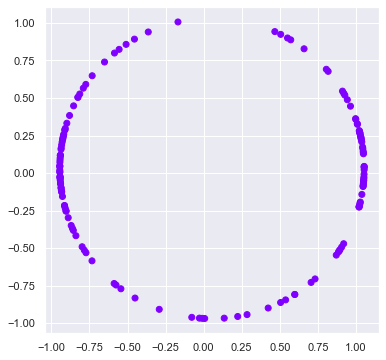

In [70]:
plt.figure(figsize = (6,6))
plt.scatter(A_principal['P1'], A_principal['P2'],c = db.fit_predict(A_principal),cmap = 'rainbow')
plt.show()

## 2. Agglomerative Clustering 

Agglomerative algorithms begin with each element as a separate cluster and merge them into successively larger clusters

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

In [71]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

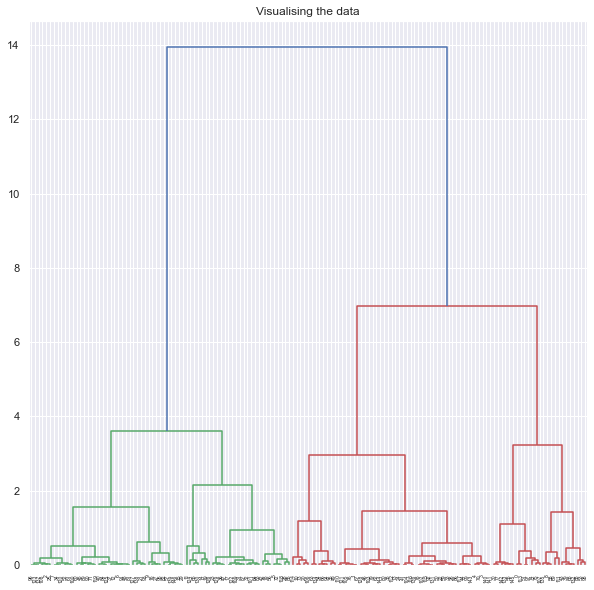

In [72]:
# visualizing the data using Histograms

plt.figure(figsize = (10,10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram(shc.linkage(A_normalized , method = 'ward'))

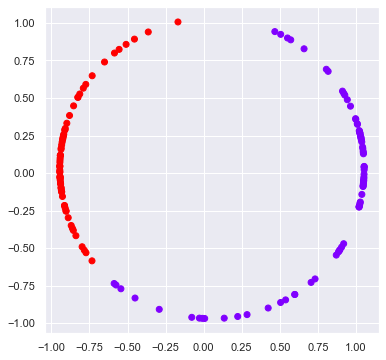

In [73]:
ac2 = AgglomerativeClustering(n_clusters=2)

#visualizing the clustering
plt.figure(figsize = (6,6))
plt.scatter(A_principal['P1'], A_principal['P2'],c = ac2.fit_predict(A_principal),cmap = 'rainbow')

plt.show()

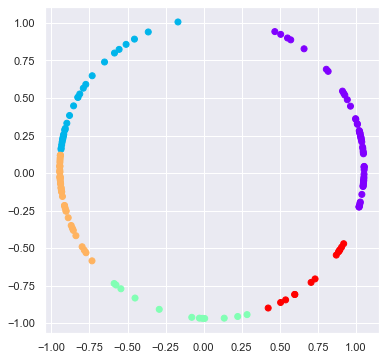

In [74]:
# When the number of clusters is set to 5
ac2 = AgglomerativeClustering(n_clusters=5)

# visualizing the clustering
plt.figure(figsize = (6,6))
plt.scatter(A_principal['P1'], A_principal['P2'],c = ac2.fit_predict(A_principal),cmap = 'rainbow')

plt.show()

## Ensemble 

* Ensembles can give you a boost in accuracy on your dataset
* The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

## 1. Bagging Method (Random Forest Classifier)

In [75]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [76]:
#spliting the training and testing data
X= df_bod.drop('target',axis=1)

# Converting this regression problem into classification problem 
# Here if the target value is greater than 3.0, it means that the BOD is above safety limit 
# Else it is within the permissible limit
y = np.where(df_bod['target'] > 3.0, 1, 0)  
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [78]:
print("The accuracy of Random Forest Classifier on Test set: ", accuracy_score(y_test, y_pred))

cnf_matrix3 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for Decision Tree model: \n\n", cnf_matrix3)



print('\n\n\n Classification report\n')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

The accuracy of Random Forest Classifier on Test set:  0.9333333333333333
Confusion Matrix for Decision Tree model: 

 [[ 4  0]
 [ 3 38]]



 Classification report

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.93      0.96        41

    accuracy                           0.93        45
   macro avg       0.79      0.96      0.84        45
weighted avg       0.96      0.93      0.94        45



## 2. Boosting Method (Adaboost)

In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

abc =AdaBoostClassifier(n_estimators=10)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8888888888888888


In [80]:
from sklearn.svm import SVC
svc=SVC(probability=True,kernel='linear')
abc =AdaBoostClassifier(n_estimators=10, base_estimator=svc)
model=abc.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9111111111111111


The Adaboost Model also gives us a better accuracy than most models - 91.11 %   
Still Random Forest Classifier performs the best in giving us an accuracy of 93.33 % 

## Conclusion -

Thus using different machine technique we have analysed the Biochemical Oxygen Demand dataset.


We achieved highest accuracy in **K-Nearest Neighbor classification & Random Forest Classification model of 93.33%**. Also **Adaboost Model came second with 91.11% accuracy for our model.** 

We performed various Data Analysis and EDA Processes. Also we used Sklearn Clustering techniques like DBSCAN and Agglomerative Clustering for our model.

Overall we understood how using a dataset such as this, we could classify and predict the Permissible Biochemical Oxygen Demand in river water.

## References 

* **State Water Resources Agency of Ukraine**
* **Portal (https://data.gov.ua/) for providing data of water monitoring is which used for this model**
* https://www.kaggle.com/vbmokin/prediction-bod-in-river-water?select=test.csv
